# Bank data analysis



The goal of your project is to create a robust classifier and use the data, with the help of which you will build a model that will recognize whether specific client will subscribe to a long term bank deposit (Binary classification).  


The first part of the analysis is visualization and display of data in order to be able to make better statistical and descriptive analysis.

An exploratory data analysis or EDA is often the first thing we do to introduce ourselves to a new dataset. It is performed to make general observations about the data, summarize it, explore some basic trends or uncover hidden relations between variables. Data visualisation can help us to better navigate in the new data and present EDA findings. In this part of project we want to add some value of the dataset that we need to analyze.

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pandas.plotting
import math
%matplotlib inline

## Read data, visualize, basic statistics, understand it

In [44]:
#read data
data = pd.read_csv('dataset.csv',sep = ';')  
# visualize the data
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [45]:
# data statistics
data.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [46]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [47]:
data['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

This shows that this is an unbalanced problem.

In [48]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','day_of_week', 'poutcome']
numerical = [x for x in data.columns.to_list() if x not in categorical]
numerical.remove('y')

In [49]:
print('Categorical features:', categorical)
print('Numerical features:', numerical)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numerical features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


Text(0.5, 0, 'Target class')

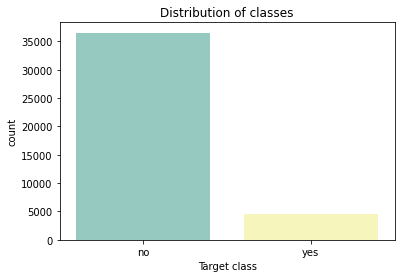

In [50]:
from matplotlib import pyplot as plt
sns.countplot(x=data['y'], palette="Set3")
plt.title('Distribution of classes')
plt.xlabel('Target class')

## Exploratory Data Analysis

to understand the data it is necessary to make a good visualization

#### pdays

In [51]:
data.pdays.describe()

count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [52]:
data.drop(columns=['pdays'],inplace = True)

#### age

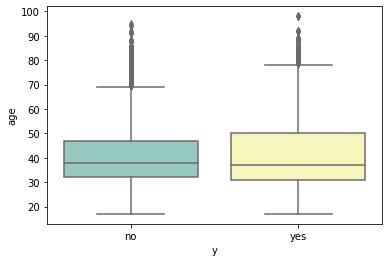

In [53]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="age", palette="Set3")
plt.show()

From the above boxplot we know that for both the customers that subscibed or didn't subscribe a term deposit, has a median age of around 38-40. And the boxplot for both the classes overlap quite a lot, which means that age isn't necessarily a good indicator for which customer will subscribe and which customer will not.

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'PDF of age for target variable y')

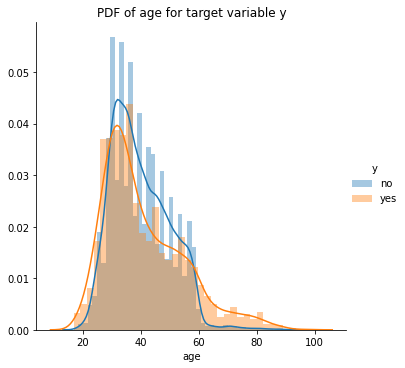

In [54]:
sns.FacetGrid(data, hue='y', size=5) \
.map(sns.distplot, 'age') \
.add_legend()
plt.title('PDF of age for target variable y')

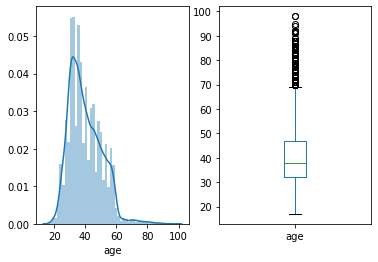

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1)
plt.subplot(121)
sns.distplot(data['age'])
plt.subplot(122)
data['age'].plot.box()

In [56]:
for x in range(95, 101 , 1):
    print("{}% of people having age are less than equal to {}".format(x, data.age.quantile(x/100)))
iqr = data.age.quantile(0.75) - data.age.quantile(0.25)
print('IQR {}'.format(iqr))

95% of people having age are less than equal to 58.0
96% of people having age are less than equal to 59.0
97% of people having age are less than equal to 59.0
98% of people having age are less than equal to 62.0
99% of people having age are less than equal to 71.0
100% of people having age are less than equal to 98.0
IQR 15.0


In [57]:
lst = [data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 30
    column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'age_group'] = 40
    column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [58]:
count_age_response_pct = pd.crosstab(data['y'],data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

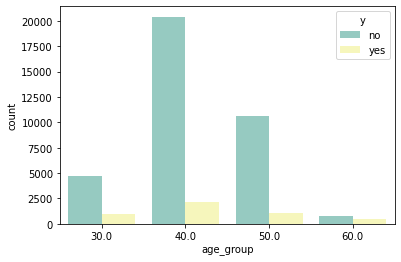

In [59]:
sns.countplot(x='age_group', data=data, hue='y', palette="Set3")

In [60]:
print('Success rate and total clients contacted for different age_groups:')
print('Clients age < 30 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 30]), data[data['age_group'] == 30].y.value_counts()[1]/len(data[data['age_group'] == 30])))
print('Clients of age 30-45 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 40]), data[data['age_group'] == 40].y.value_counts()[1]/len(data[data['age_group'] == 40])))
print('Clients of age 40-60 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 50]), data[data['age_group'] == 50].y.value_counts()[1]/len(data[data['age_group'] == 50])))
print('Clients of 60+ age contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 60]), data[data['age_group'] == 60].y.value_counts()[1]/len(data[data['age_group'] == 60])))

Success rate and total clients contacted for different age_groups:
Clients age < 30 contacted: 5669, Success rate: 0.1626389133886047
Clients of age 30-45 contacted: 22585, Success rate: 0.0959929156519814
Clients of age 40-60 contacted: 11741, Success rate: 0.09181500723958777
Clients of 60+ age contacted: 1193, Success rate: 0.3956412405699916


This graph indicates that the bank was focused on the 30s aged group(red bar), but this group has lower subscription rates(green bar) compared to the others aged groups.The bank was more effective with 20s and 60s aged group, which should be the next target. Considering that the term deposits are the most liquid and the most secure investment, the pattern is expected.The oldest aged group want to have cash and youngest do not have experience, knowledge and enough money for better and more sophisticated investments. On other hand, the 30s aged group have more loans and less money for savings.

#### duration

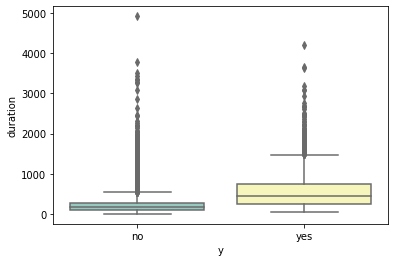

In [69]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="duration", palette="Set3")
plt.show()

From the above plot it is clear that, the duration (last contact duration) of a customer can be useful for predicting the target variable. It is expected because it is already mentioned in the data overview that this field highely affects the target variable and should only be used for benchmark purposes.

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'PDF of duration for target variable y')

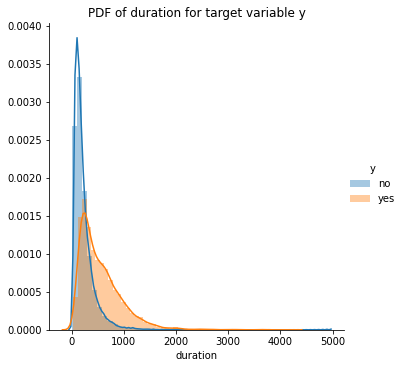

In [70]:
sns.FacetGrid(data, hue='y', size=5) \
.map(sns.distplot, 'duration') \
.add_legend()
plt.title('PDF of duration for target variable y')

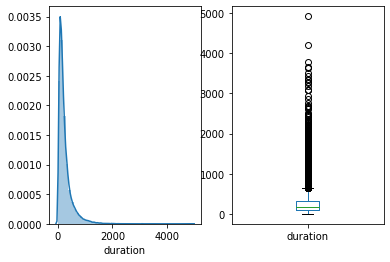

In [71]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['duration'])
plt.subplot(122)
data['duration'].plot.box()

In [72]:
for x in range(95, 101 , 1):
    print("{}% of calls have duration less than equal to {}".format(x, data.duration.quantile(x/100)))
iqr = data.duration.quantile(0.75) - data.duration.quantile(0.25)
print('IQR {}'.format(iqr))

95% of calls have duration less than equal to 752.6500000000015
96% of calls have duration less than equal to 820.5199999999968
97% of calls have duration less than equal to 911.0
98% of calls have duration less than equal to 1052.260000000002
99% of calls have duration less than equal to 1271.1299999999974
100% of calls have duration less than equal to 4918.0
IQR 217.0


#### campaign

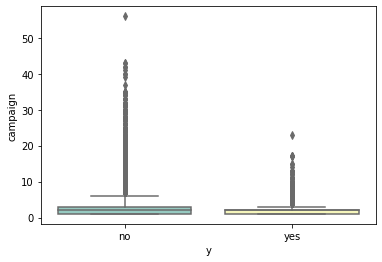

In [73]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="campaign", palette="Set3")
plt.show()

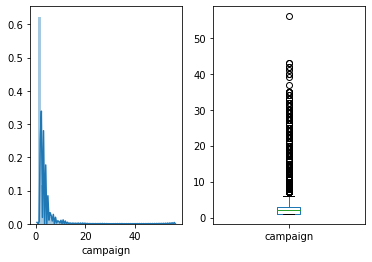

In [74]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['campaign'])
plt.subplot(122)
data['campaign'].plot.box()

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'PDF of campaign for target variable y')

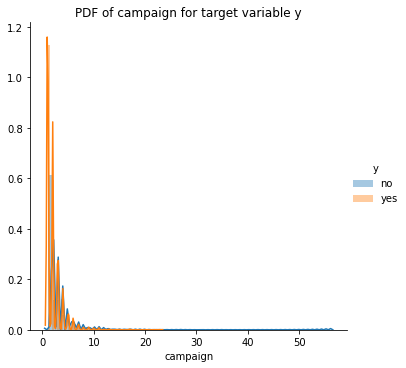

In [75]:
sns.FacetGrid(data, hue='y', size=5) \
.map(sns.distplot, 'campaign') \
.add_legend()
plt.title('PDF of campaign for target variable y')

#### emp.var.rate

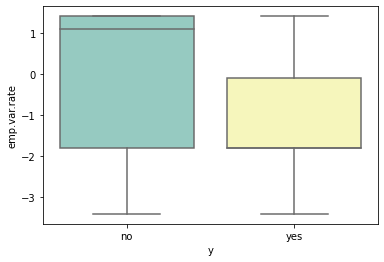

In [76]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="emp.var.rate", palette="Set3")
plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'PDF of emp.var.rate for target variable y')

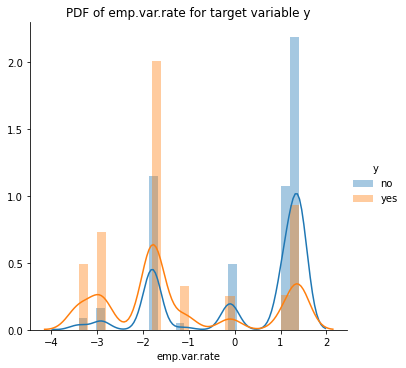

In [77]:
sns.FacetGrid(data, hue='y', size=5) \
.map(sns.distplot, 'emp.var.rate') \
.add_legend()
plt.title('PDF of emp.var.rate for target variable y')

#### cons.price.idx

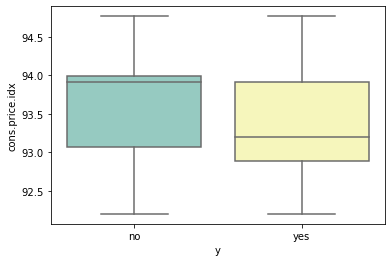

In [78]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="cons.price.idx", palette="Set3")
plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'PDF of emp.var.rate for target variable y')

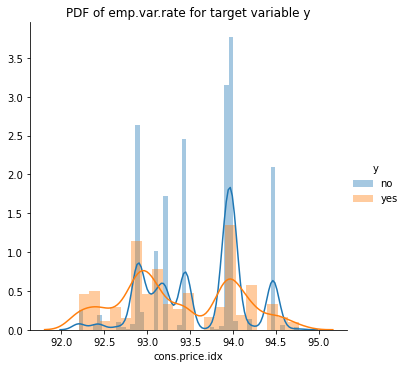

In [79]:
sns.FacetGrid(data, hue='y', size=5) \
.map(sns.distplot, 'cons.price.idx') \
.add_legend()
plt.title('PDF of emp.var.rate for target variable y')

#### cons.conf.idx

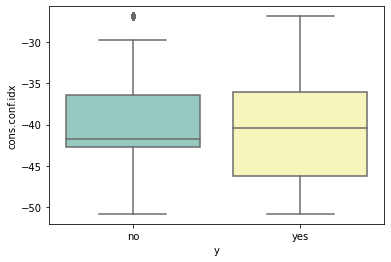

In [80]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="cons.conf.idx", palette="Set3")
plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'PDF of emp.var.rate for target variable y')

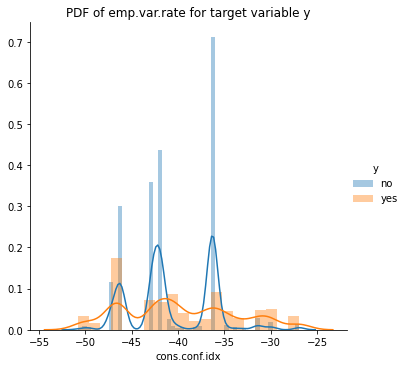

In [81]:
sns.FacetGrid(data, hue='y', size=5) \
.map(sns.distplot, 'cons.conf.idx') \
.add_legend()
plt.title('PDF of emp.var.rate for target variable y')

#### nr.employed

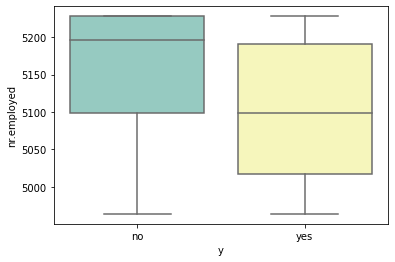

In [82]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="nr.employed", palette="Set3")
plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'PDF of emp.var.rate for target variable y')

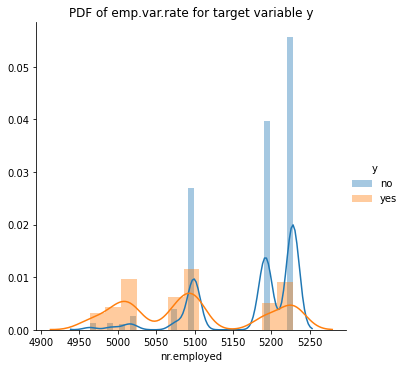

In [83]:
sns.FacetGrid(data, hue='y', size=5) \
.map(sns.distplot, 'nr.employed') \
.add_legend()
plt.title('PDF of emp.var.rate for target variable y')

### Distribution of Class variable

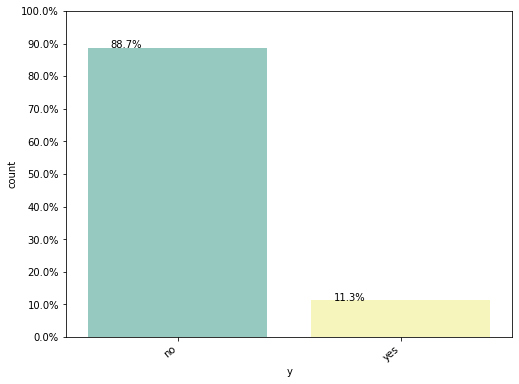

In [84]:
plt.figure(figsize=(8,6))
Y = data['y']
total = len(Y)*1.
ax=sns.countplot(x="y", data=data, palette="Set3")
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.show()

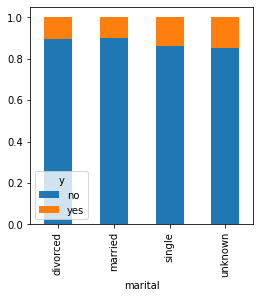

In [87]:
Marriage=pd.crosstab(data["marital"],data['y'])
Marriage.div(Marriage.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

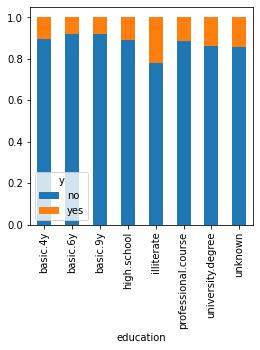

In [88]:
Education=pd.crosstab(data["education"],data['y'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

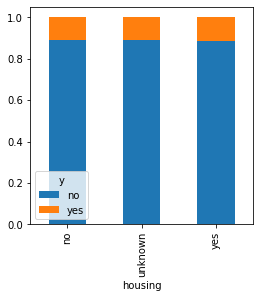

In [89]:
House=pd.crosstab(data["housing"],data['y'])
House.div(House.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

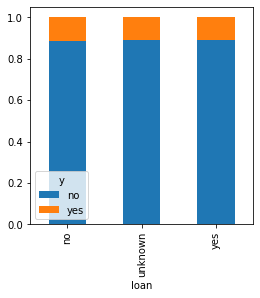

In [90]:
Loan=pd.crosstab(data["loan"],data['y'])
Loan.div(Loan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

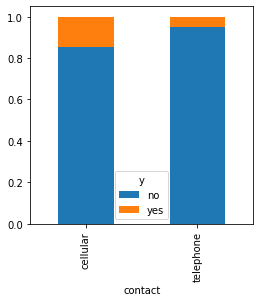

In [91]:
Con=pd.crosstab(data["contact"],data['y'])
Con.div(Con.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

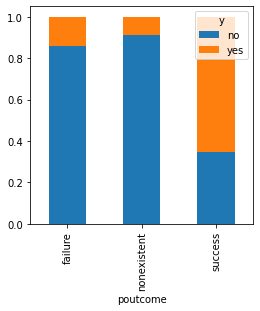

In [92]:
POC=pd.crosstab(data["poutcome"],data['y'])
POC.div(POC.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

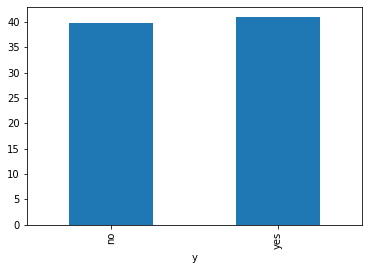

In [93]:
data.groupby('y')['age'].mean().plot.bar()

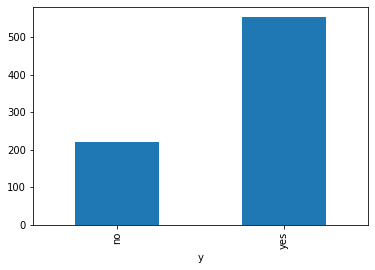

In [94]:
data.groupby('y')['duration'].mean().plot.bar()

### Аdditional functions for better attribute visualization and comparative analysis

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

def countplot(label, dataset):
  plt.figure(figsize=(15,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [96]:
%matplotlib inline

def countplot_withY(label, dataset):
  plt.figure(figsize=(20,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

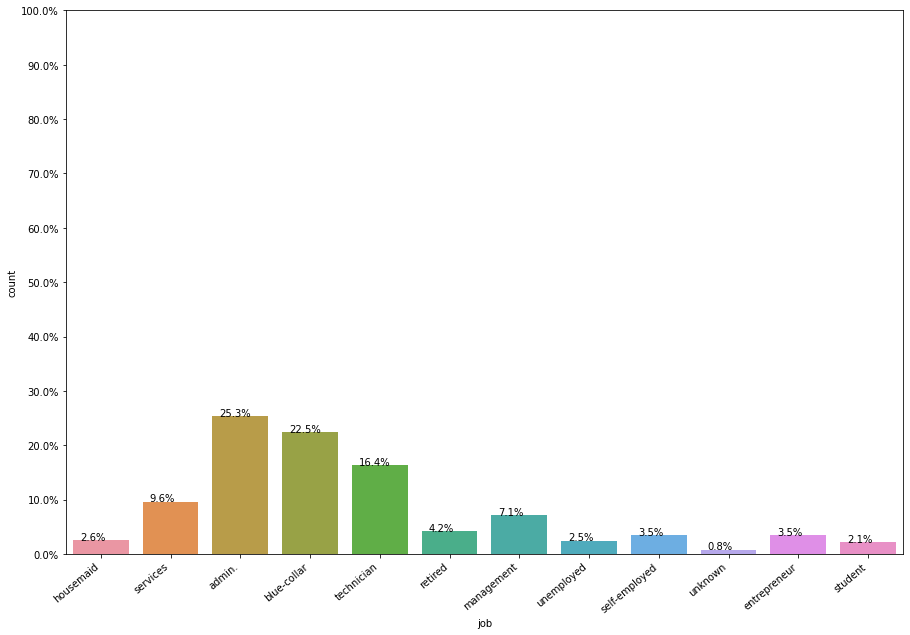

In [97]:
countplot("job", data)

From the above plot, we can see that the customers who have a job of admin have the highest rate of subscribing a term deposit, but they are also the highest when it comes to not subscribing. This is simply because we have more customers working as admin than any other profession.

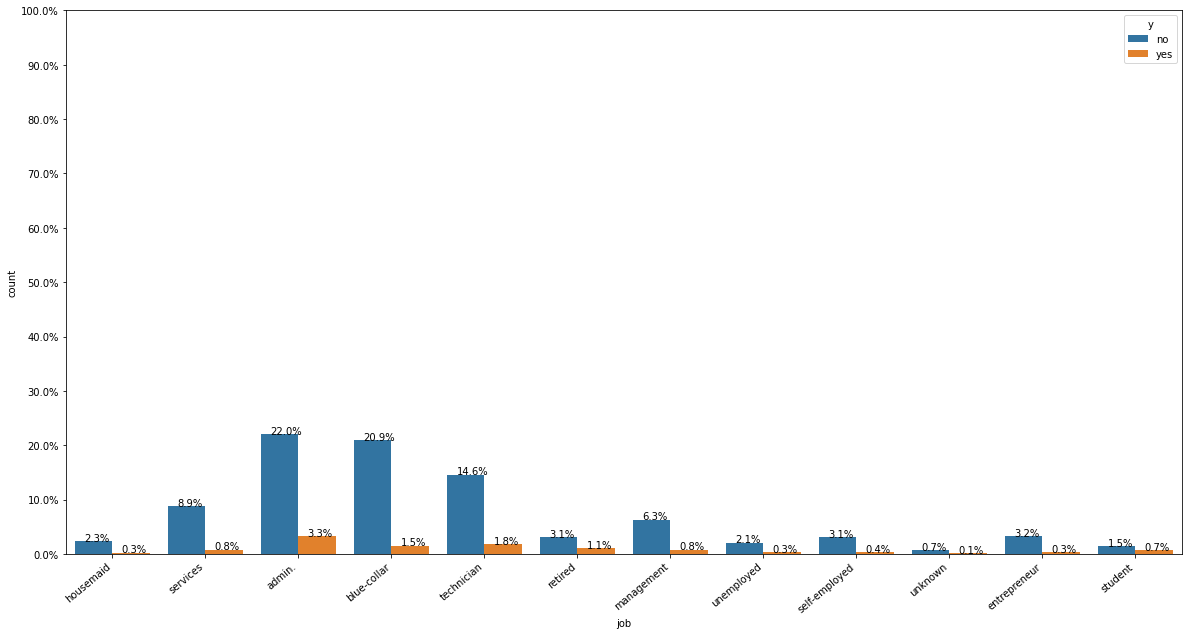

In [98]:
countplot_withY("job", data)

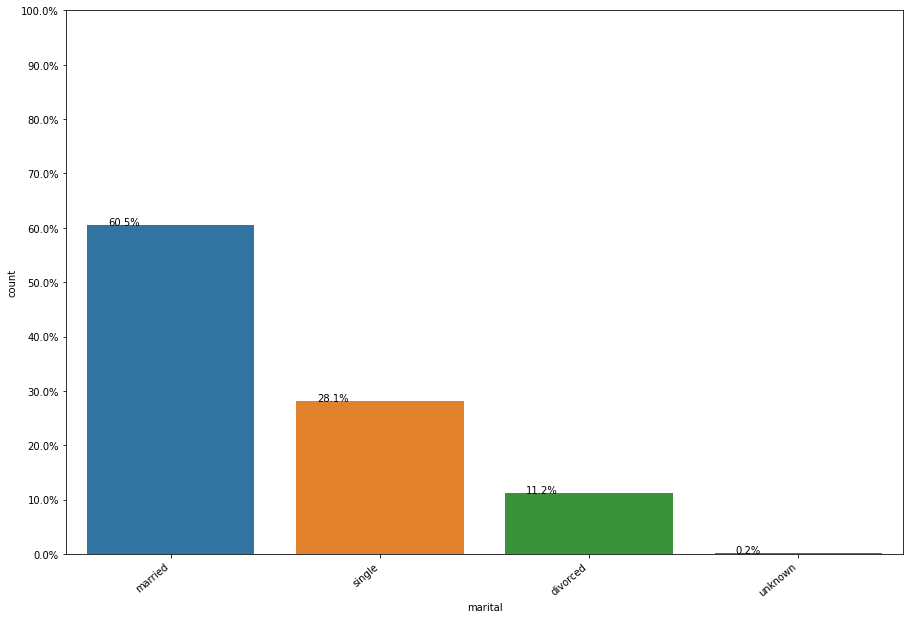

In [99]:
countplot("marital", data)

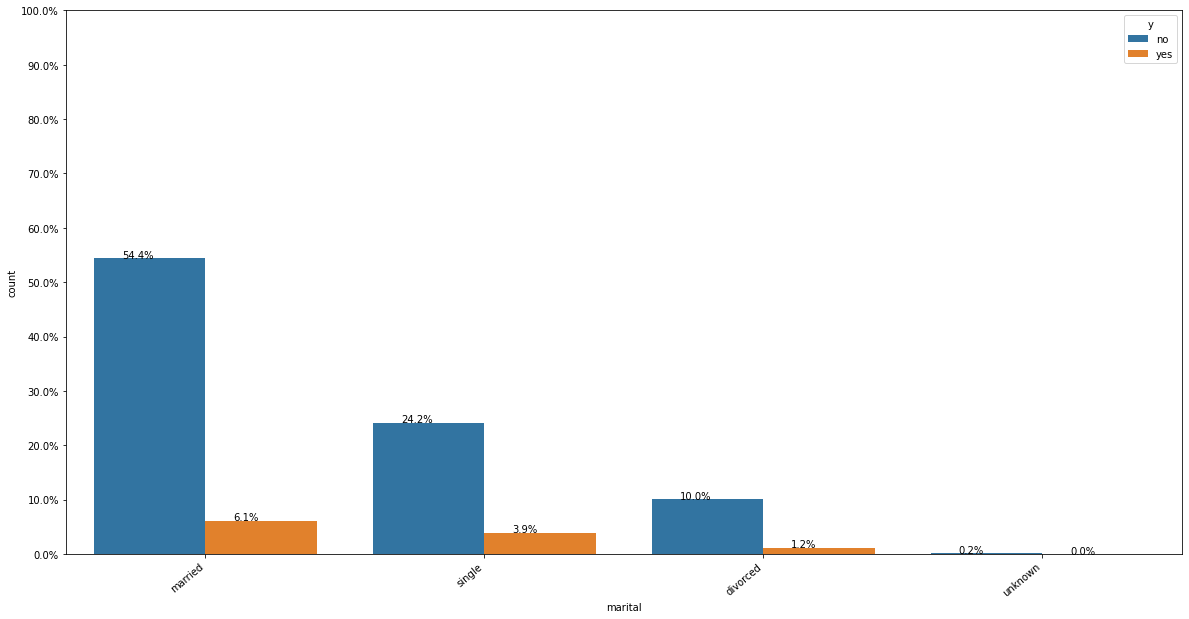

In [100]:
countplot_withY("marital", data)

Majority of the customers are married. Followed by Single, divorced and unknown.

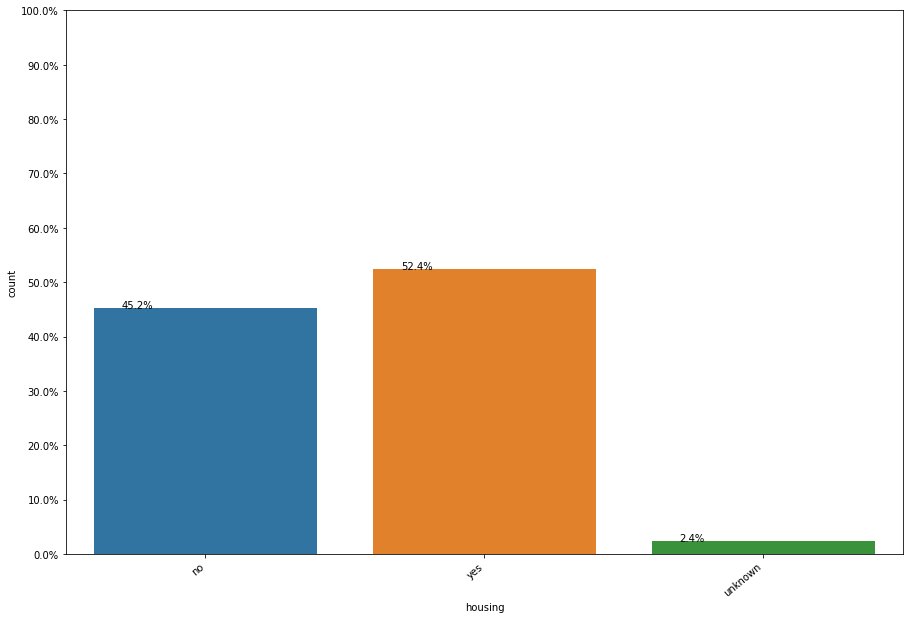

In [101]:
countplot("housing", data)

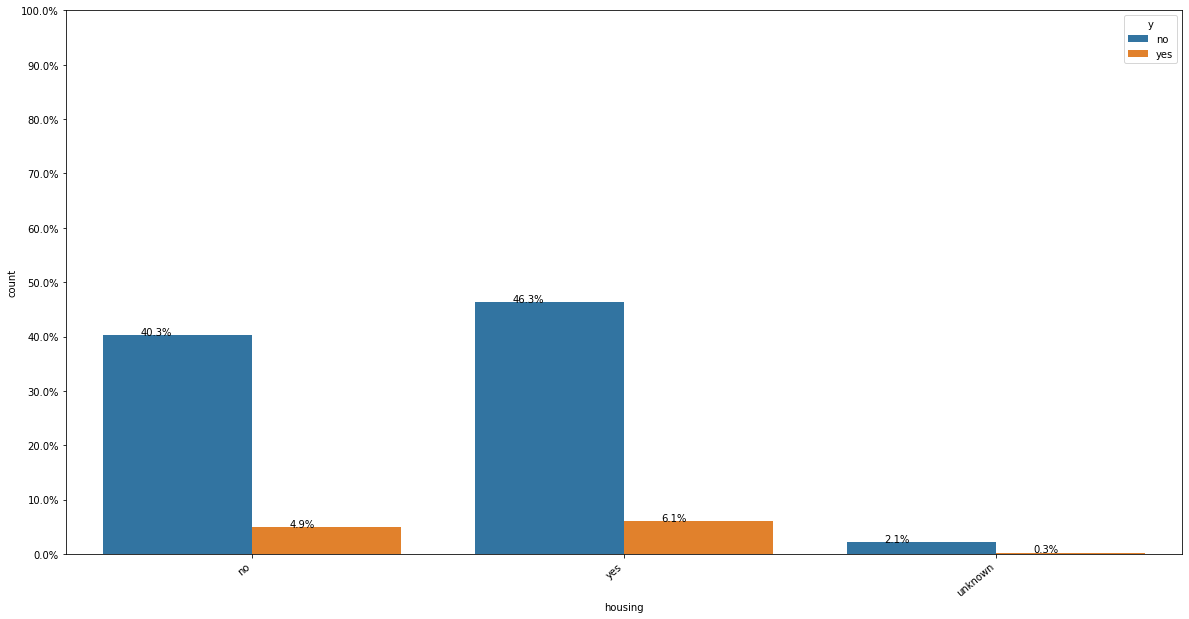

In [102]:
countplot_withY("housing", data)

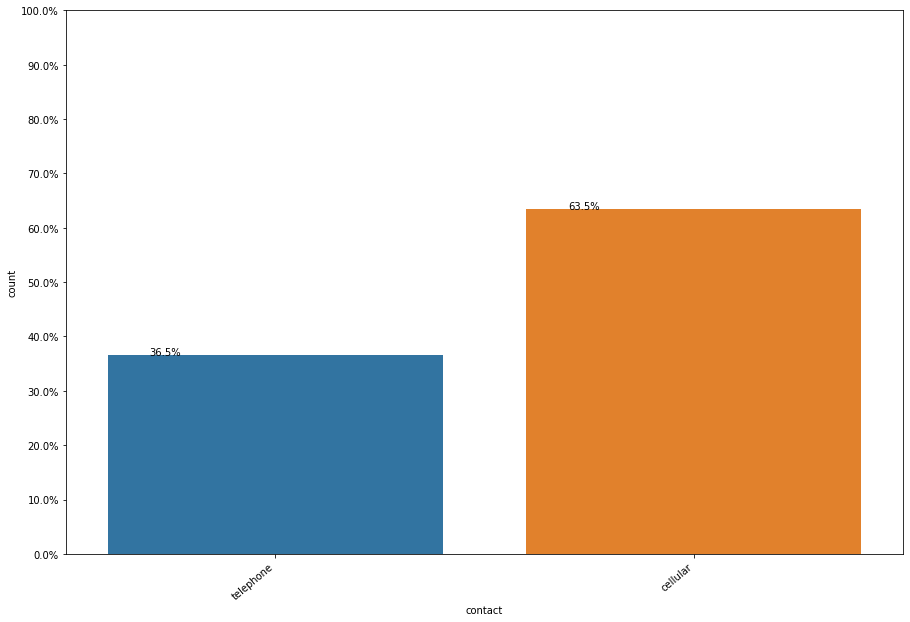

In [103]:
countplot("contact", data)

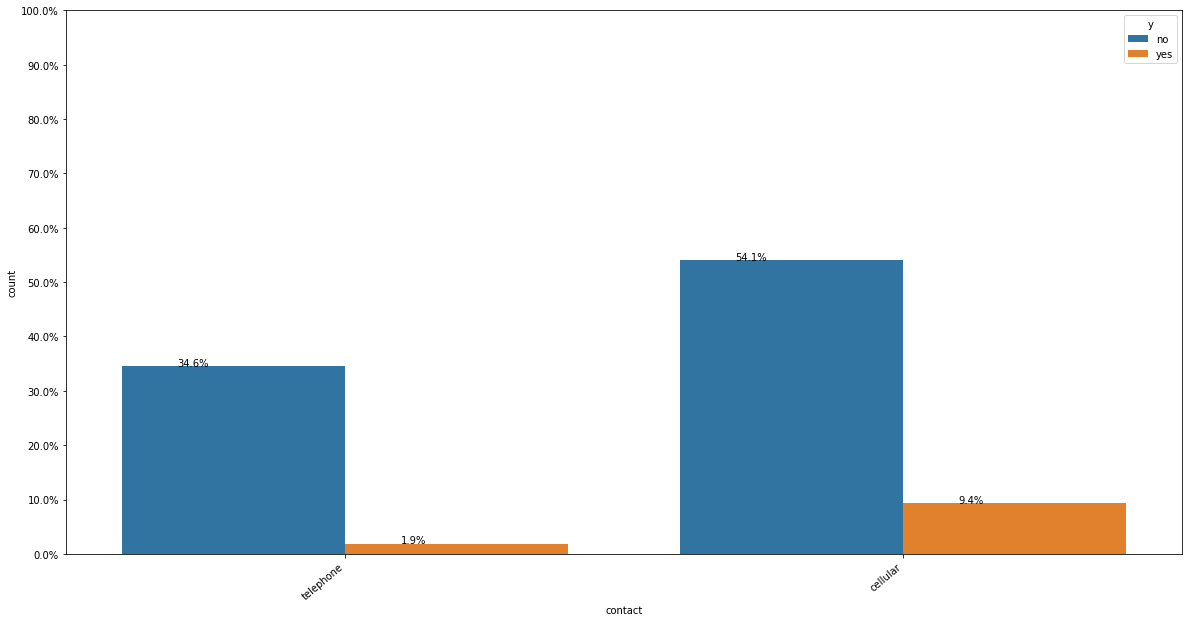

In [104]:
countplot_withY("contact", data)

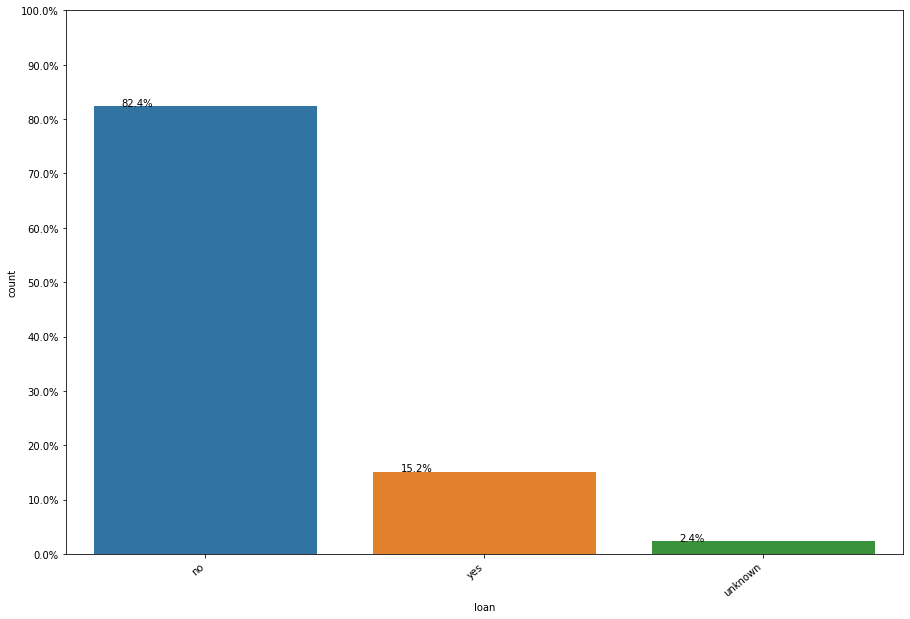

In [105]:
countplot("loan", data)

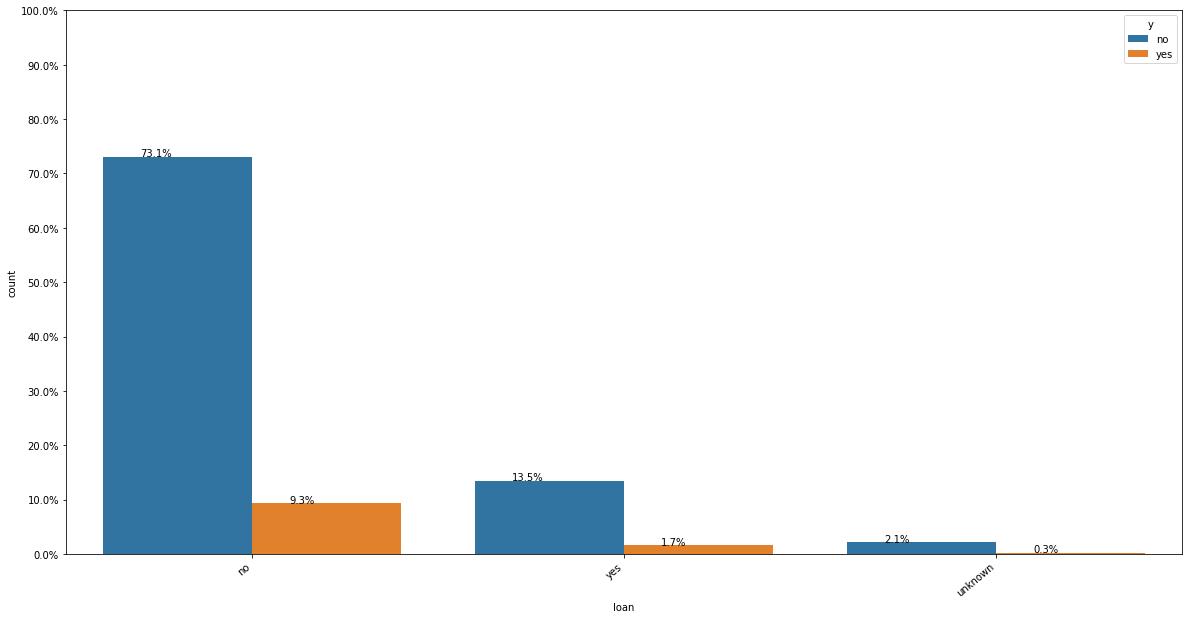

In [106]:
countplot_withY("loan", data)

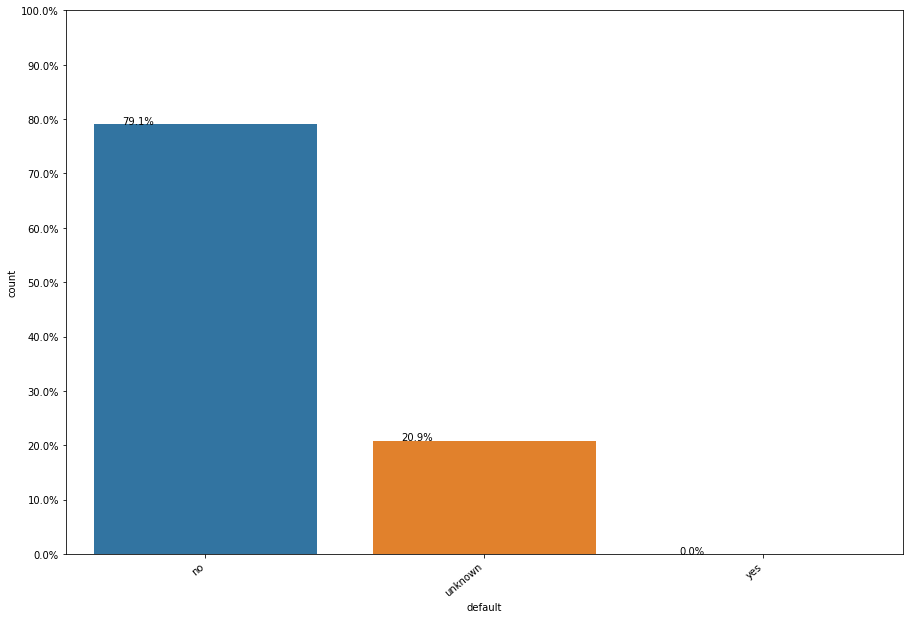

In [107]:
countplot("default", data)

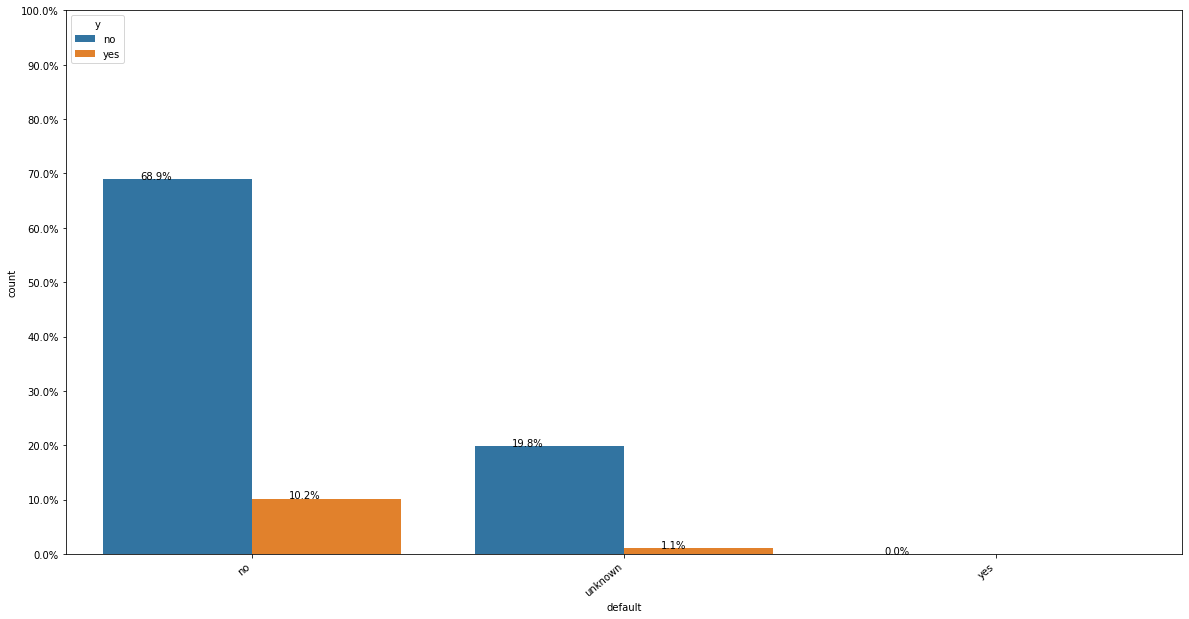

In [108]:
countplot_withY("default", data)

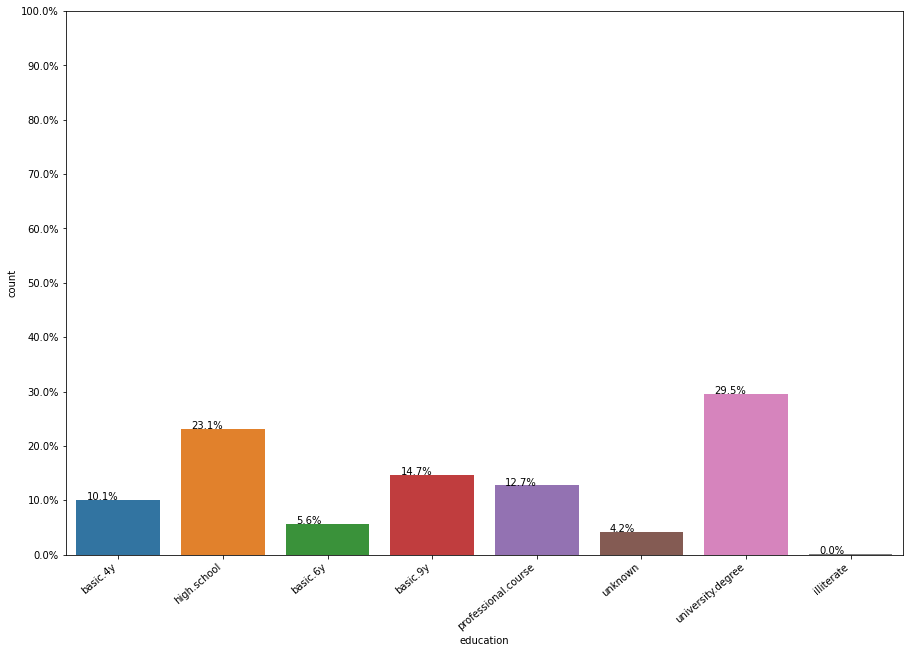

In [109]:
countplot("education", data)

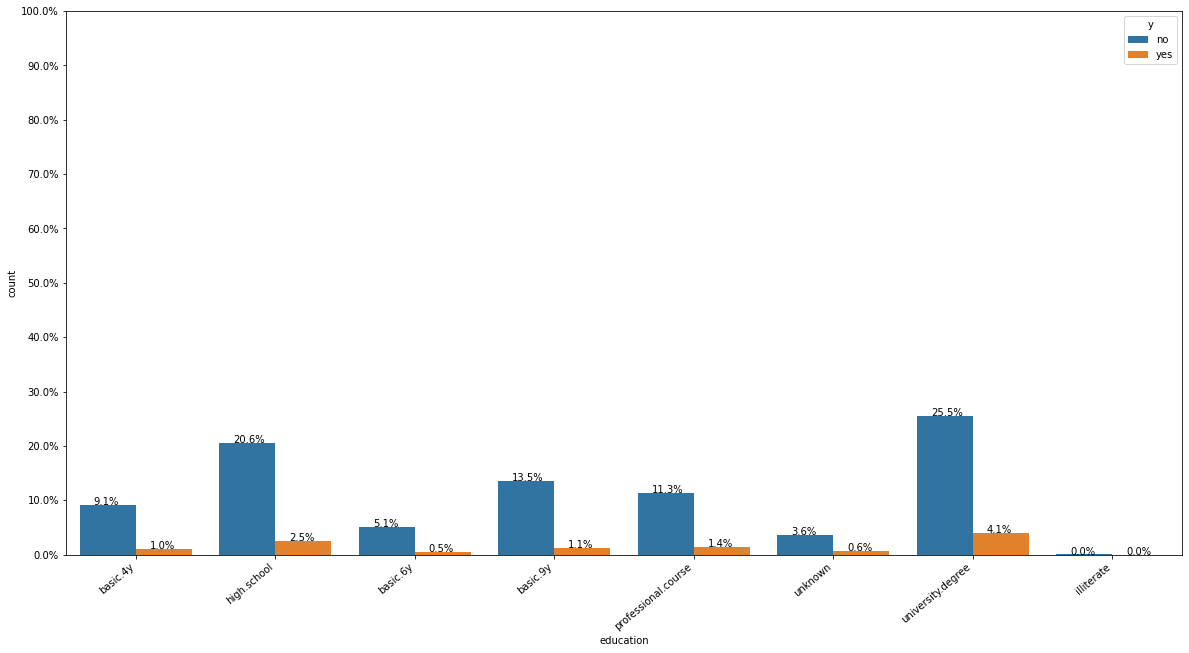

In [110]:
countplot_withY("education", data)

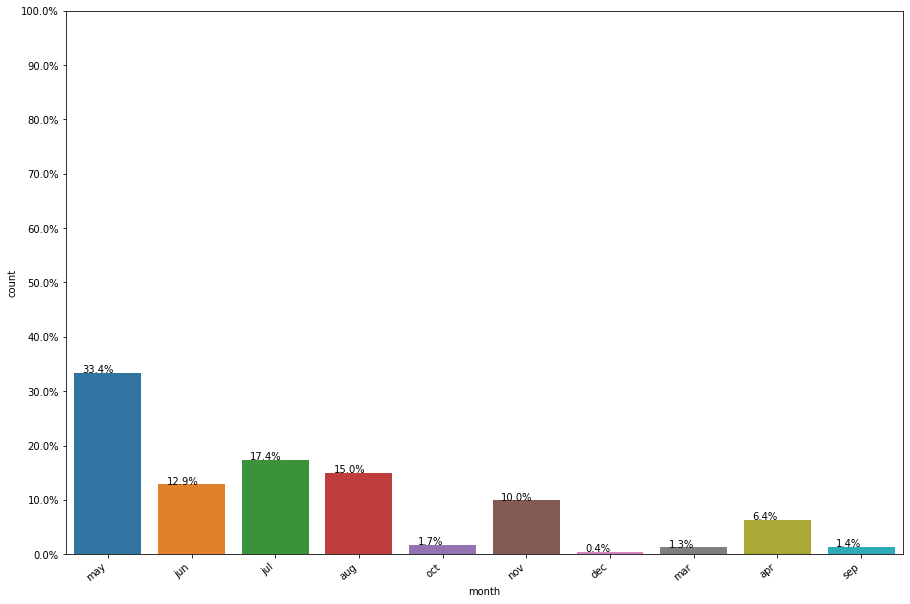

In [111]:
countplot("month", data)


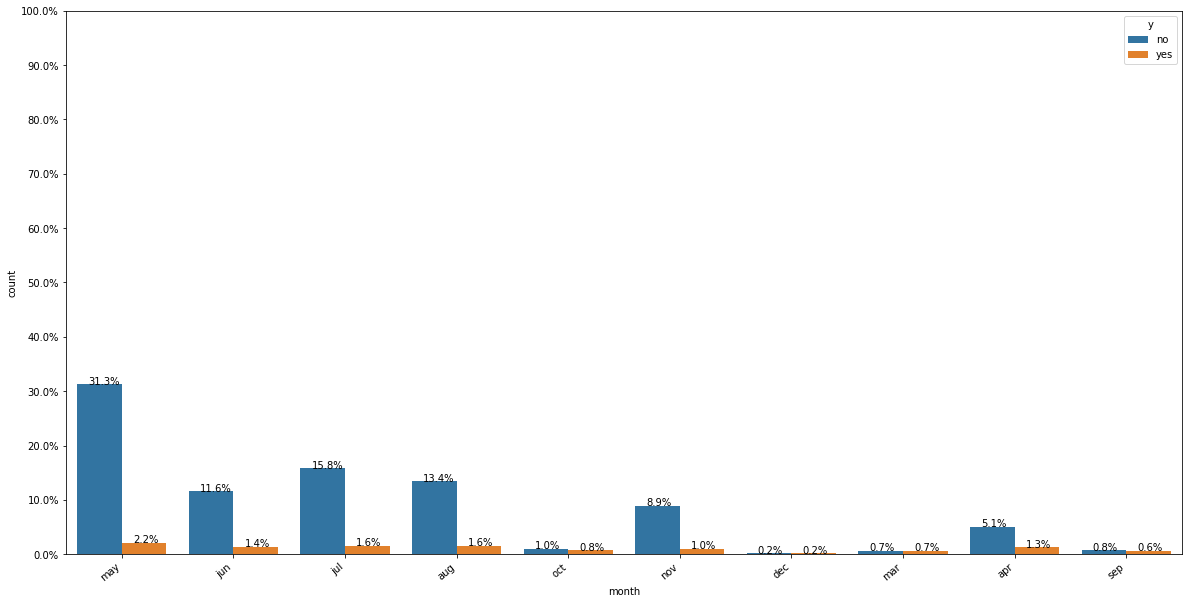

In [112]:
countplot_withY("month", data)

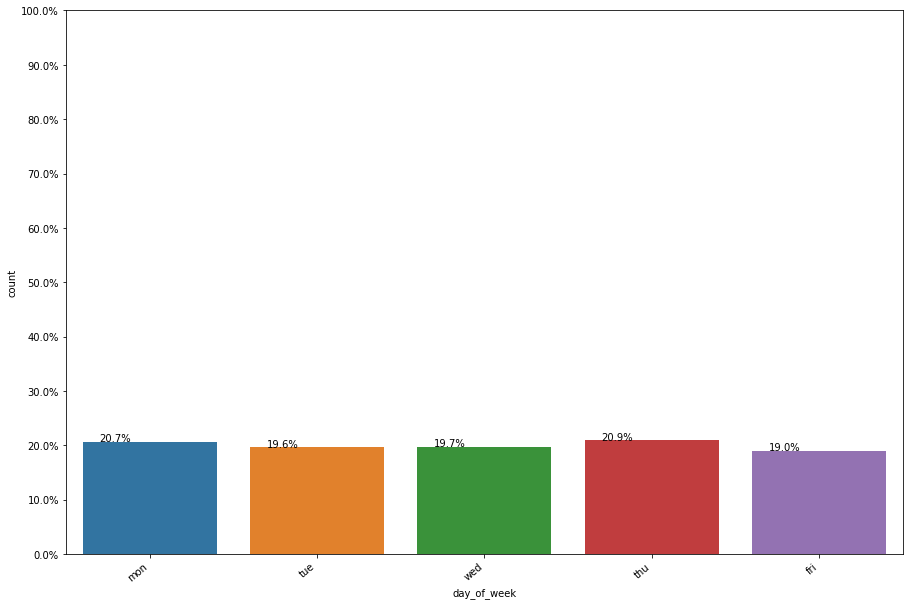

In [113]:
countplot("day_of_week", data)


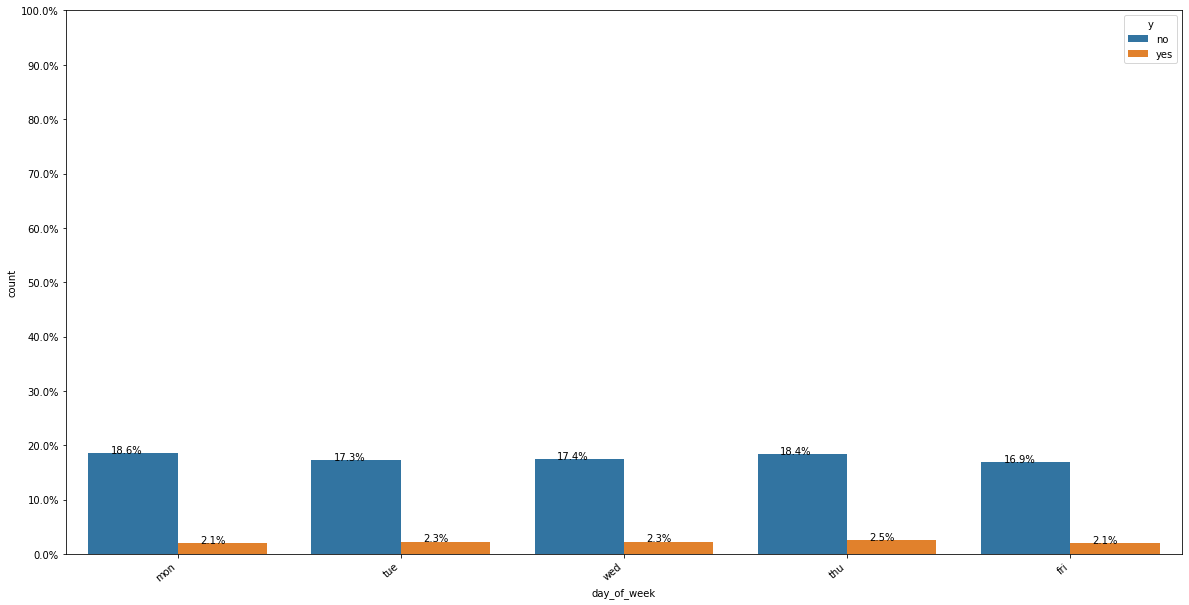

In [114]:
countplot_withY("day_of_week", data)

Now we can plot the distributin of each feature all in one

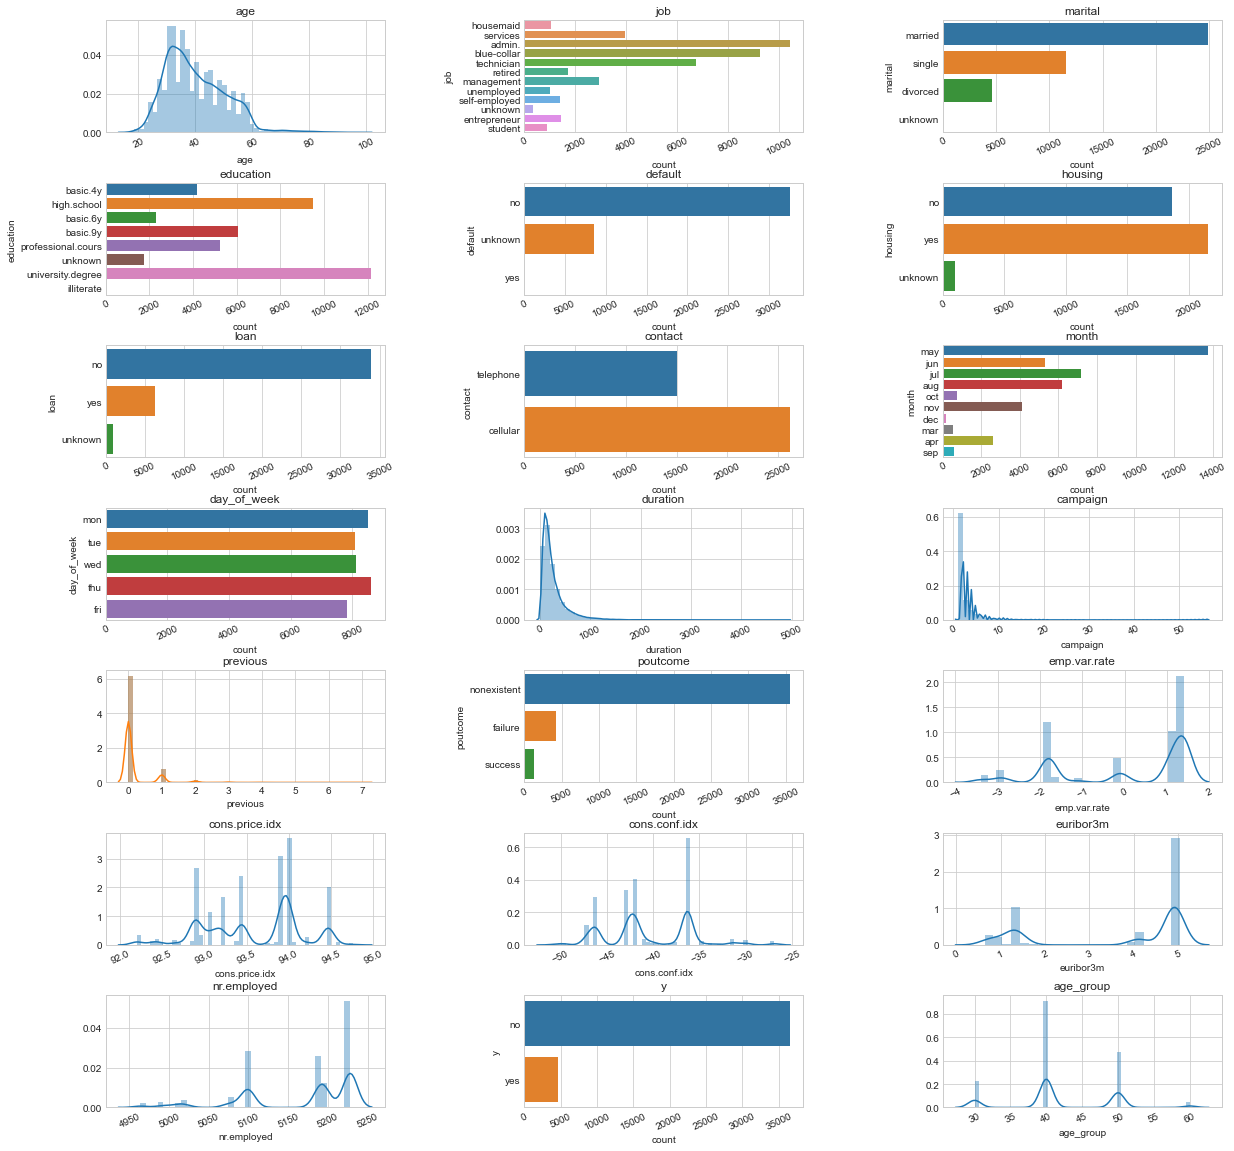

In [115]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            try:
                g = sns.distplot(dataset[column])
                plt.xticks(rotation=25)
            except RuntimeError as re:
                if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
                    sns.distplot(dataset[column], kde_kws={'bw': 0.1})
                else:
                    raise re
    
plot_distribution(data, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

In [116]:
lst = [data]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

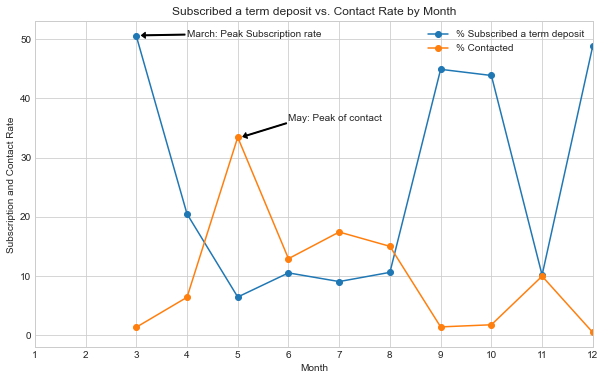

In [117]:
count_month_y = pd.crosstab(data['y'],data['month_int']).apply(lambda x: x/x.sum() * 100)
count_month_y = count_month_y.transpose()

month = pd.DataFrame(data['month_int'].value_counts())
month['% Contacted'] = month['month_int']*100/month['month_int'].sum()
month['% Subscribed a term deposit'] = count_month_y['yes']
month.drop('month_int',axis = 1,inplace = True)
month['Month'] = [5,7,8,6,11,4,10,9,3,12]
month = month.sort_values('Month',ascending = True)


plot_month = month[['% Subscribed a term deposit','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')
plt.title('Subscribed a term deposit vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')
ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of contact
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')
# Annotation: peak of subscription rate
y = month['% Subscribed a term deposit'].max()
x = month['% Subscribed a term deposit'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')
plt.show()

The graphic above shows the bank’s contact rate and clients’ response rate in each month in each month.The trends of the lines have diffrent directions. This can be interpret on two ways. Either the bank starts to contact the clients when the demand of deposits starts to decrease or that the bank has bad timing for contacting. The contact rate is the highest in may and august and on other hand, the highest subscription rate occured in march, september and october.


### Correlation matrix of numerical features

In [118]:
#Change 'day' from words to numbers for easier analysis
#"mon","tue","wed","thu","fri"
lst = [data]
for column in lst:
    column.loc[column["day_of_week"] == "mon", "day_int"] = 1
    column.loc[column["day_of_week"] == "tue", "day_int"] = 2
    column.loc[column["day_of_week"] == "wed", "day_int"] = 3
    column.loc[column["day_of_week"] == "thu", "day_int"] = 4
    column.loc[column["day_of_week"] == "fri", "day_int"] = 5
    

In [119]:
lst = [data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [120]:
count_age_y = pd.crosstab(data['y'],data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_y = count_age_y.transpose()

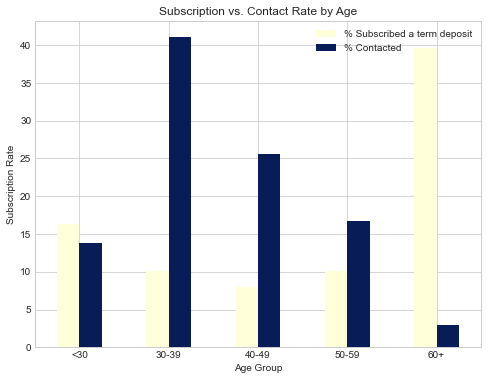

In [124]:
age = pd.DataFrame(data['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscribed a term deposit'] = count_age_y['yes']
age.drop('age_group',axis = 1,inplace = True)
age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Subscribed a term deposit','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), cmap='YlGnBu')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

In [122]:
def drawheatmap(df):
    matrix = data.corr()
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(matrix, vmax=.8, square=True, cmap='YlGnBu', ax=ax, annot=True, linewidth=0.1)

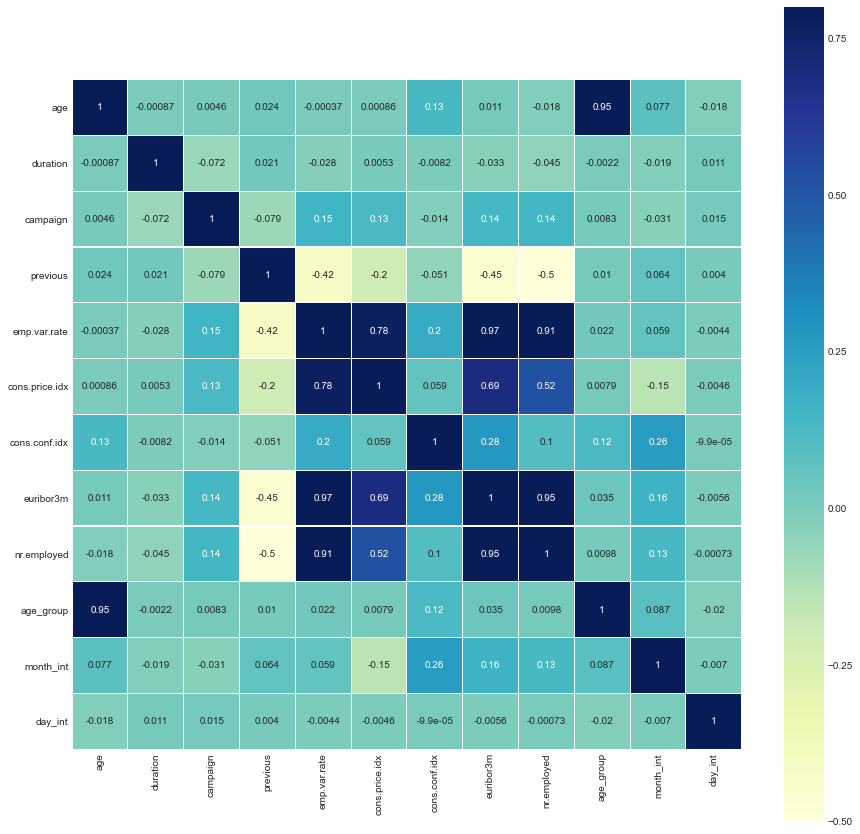

In [123]:
drawheatmap(data)

From the above heatmap we can see that there are some numerical features which share a high correlation between them, e.g nr.employed and euribor3m these features share a correlation value of 0.95, and euribor3m and emp.var.rate share a correlation of 0.97, which is very high compared to the other features that we see in the heatmap.